<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [3]:
#1. Creamos un nuevo Dataframe que contenga solo las columnas con datos numericos
dfnum = df.select_dtypes(include = 'number')
#reemplazamos los vacíos con el promedio
dfnum = dfnum.fillna(dfnum.mean())
#escalamos con minmaxscaler
scaler = MinMaxScaler()
dfnumnorm = pd.DataFrame(scaler.fit_transform(dfnum), columns = dfnum.columns)
dfnumnorm.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [4]:
#2. Ahora crearemos un nuevo df con las variables categoricas
dfcat = df.select_dtypes(include = 'object')
dfcatdum = pd.get_dummies(dfcat)
dfcatdum

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Se realiza un cambio de variables categóricas a variables numéricas mediante el conteo de cada tipo de de dato.

In [5]:
#3. Concatenamos
df_procesado=pd.concat([dfnumnorm,dfcatdum],axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [6]:
# 1.- Ajuste a K-means
k = 8
n = 10
kmeans = KMeans(n_clusters = k, n_init = n, random_state = 42)
kmeans.fit(df_procesado)

KMeans(n_init=10, random_state=42)

In [7]:
#2
#Asociar cada dato con su cluster
clusters = kmeans.predict(df_procesado)

#Calcular valor de cada centroide
centroids = kmeans.cluster_centers_


In [8]:
#3. Resumen
cluster_summary = pd.DataFrame()

cluster_summary['promedio'] = df_procesado.groupby(clusters).mean().mean(axis=1)
for columna in df_procesado:
  if df_procesado[columna].dtype != 'object':
    cluster_summary[f'Moda de {columna}'] = df_procesado.groupby(clusters)[columna].apply(lambda x: x.mode().iloc[0])
cluster_summary.head()

,promedio,Moda de year,Moda de desplazamiento,Moda de cilindros,Moda de co2,Moda de consumo_litros_milla,Moda de clase_tipo_Camionetas,Moda de clase_tipo_Coche Familiar,Moda de clase_tipo_Coches Grandes,Moda de clase_tipo_Coches Medianos,...,Moda de consumo_tipo_alto,Moda de consumo_tipo_bajo,Moda de consumo_tipo_moderado,Moda de consumo_tipo_muy alto,Moda de consumo_tipo_muy bajo,Moda de co2_tipo_alto,Moda de co2_tipo_bajo,Moda de co2_tipo_moderado,Moda de co2_tipo_muy alto,Moda de co2_tipo_muy bajo
0,0.250228,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.239902,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.226047,0.029412,0.179487,0.142857,0.275108,0.194444,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.260145,0.558824,0.653846,0.428571,0.454199,0.393464,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.233967,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [9]:
#Regla del codo
compare = [5,10,20,30,50,75,100,200,300]

inercia = []

for k in compare:
  kmeans = KMeans(n_clusters = k, n_init = 10, random_state=42)
  kmeans.fit(df_procesado)
  inercia.append(kmeans.inertia_)

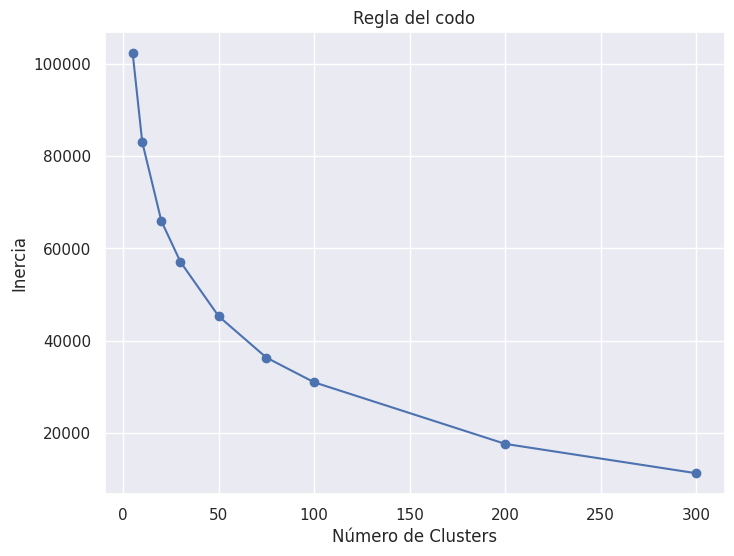

In [10]:
#Graficamos regla del codo
fig,axs = plt.subplots(figsize = (8,6))
plt.plot(compare, inercia, marker = 'o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Regla del codo')
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [12]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [14]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris[features])

# Data frame con el ajuste
pca_df = pd.DataFrame(data = pca_result , columns = ['PC1','PC2'])
pca_df['species'] = iris[target]

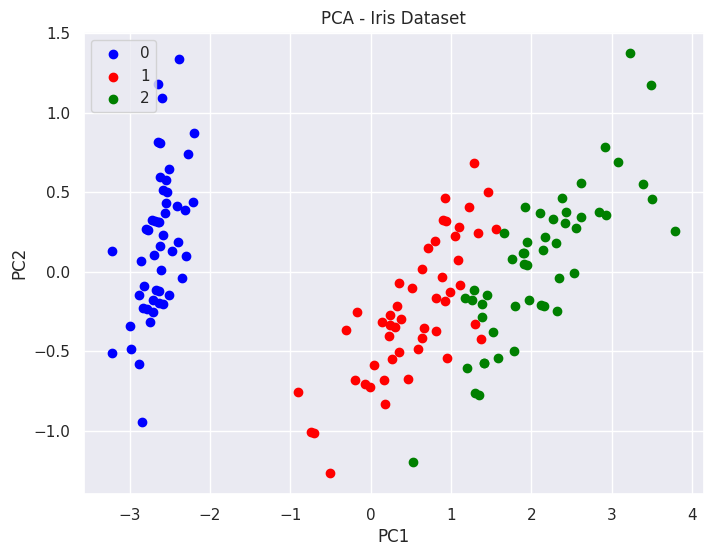

In [15]:
# Graficamos el ajuste
plt.figure(figsize=(8,6))
targets = [0,1,2]
colors = ['blue', 'red', 'green']
for target, color in zip(targets, colors):
  indices = pca_df['species'] == target
  plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c = color, label = target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.show()

In [16]:
# t-SNE
target = 'species'
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(iris[features])

# Data frame con el ajuste
tsne_df = pd.DataFrame(data = tsne_result , columns = ['Dim1','Dim2'])
tsne_df['species'] = iris[target].copy()

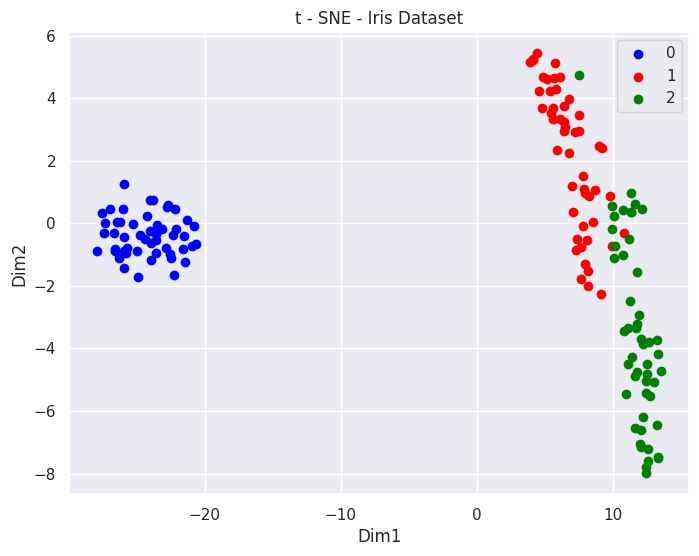

In [18]:
# Graficamos el ajuste
plt.figure(figsize=(8,6))
targets = [0,1,2]
colors = ['blue', 'red', 'green']
for target, color in zip(targets, colors):
  indices = tsne_df['species'] == target
  plt.scatter(tsne_df.loc[indices, 'Dim1'], tsne_df.loc[indices, 'Dim2'], c = color, label = target)
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('t - SNE - Iris Dataset')
plt.legend()
plt.show()

Notamos que ambos algoritmos reconocen al dato 0 alejado de los datos 1 y 2, es decir, una planta que tenga dato tipo 0 es poco probable de ser confundida con otro tipo de planta. En cambio, ambos algoritmos tienen datos que se podrían eventualmente confundir entre dato 1 y dato 2.